#Supervised Learning#

##Import Package##

In [1]:
#import package
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Load Dataset##

In [2]:
#read dataset
data = pd.read_csv('/content/drive/MyDrive/PZIB 2023/Tugas Data Analyst/Tugas 13-14/House Prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##Data Understanding##

In [3]:
#untuk mengetahui informasi mengenai dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#mencari informasi statistical summary pada data numerik
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(0, 0.5, 'SalePrice')

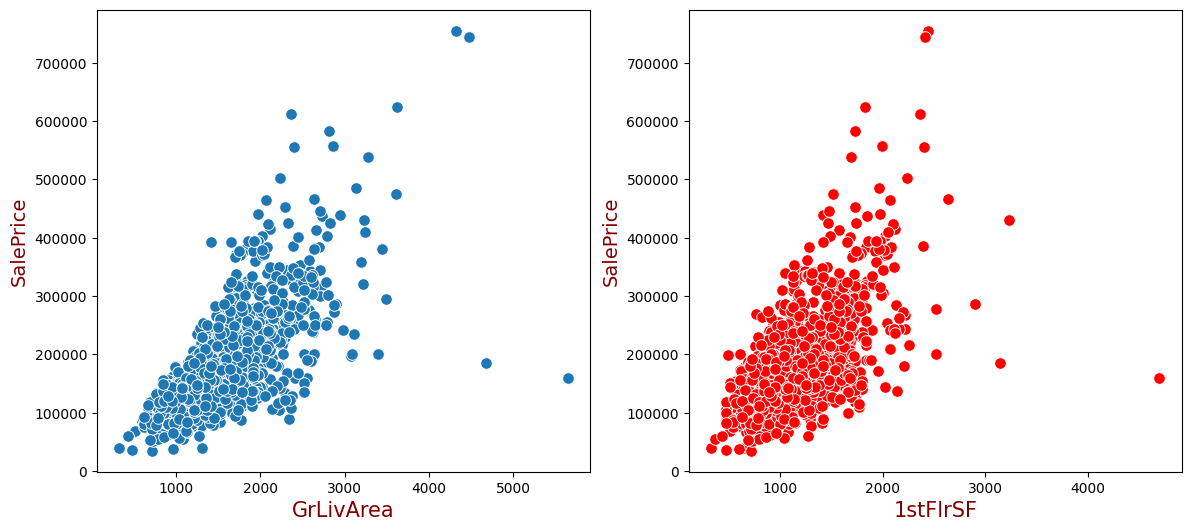

In [5]:
#Visualisasi beberapa variabel yang akan digunakan (GrLivArea,1stFlrSF)
fig, ax = plt.subplots(1,2,figsize=(14,6))

g = sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, s=70, ax=ax[0])
ax[0].set_xlabel('GrLivArea', fontsize=15, color='#800000')
ax[0].set_ylabel('SalePrice', fontsize=14, color='#800000')

g = sns.scatterplot(x='1stFlrSF', y='SalePrice', data=data, s=70, ax=ax[1], color='red')
ax[1].set_xlabel('1stFlrSF', fontsize=15, color='#800000')
ax[1].set_ylabel('SalePrice', fontsize=14, color='#800000')

###Cleansing Data###

In [6]:
#mengambil variabel numerik
nums = data.select_dtypes(include = ['float64', 'int64'])

In [7]:
#mencari jumlah missing value pada setiap variabel
nums.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [8]:
#Handling missing values pada variabel MasVnrArea
nums['MasVnrArea'] = nums['MasVnrArea'].fillna(value=nums['MasVnrArea'].mean())

In [9]:
#mengeluarkan variabel LotFrontage dan GarageYrBlt karena memiliki missing values yang cukup banyak
nums.drop(['LotFrontage','GarageYrBlt'], 1, inplace=True)

#melihat missing values
nums.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

##Regression Model##

In [10]:
#Import packages untuk modelling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
#Memisahkan variabel (X) dengan target (Y)
X = nums.drop('SalePrice', 1).values
Y = nums['SalePrice'].values

#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state= 42)

In [12]:
#fitting model dan memprediksi data
linreg = LinearRegression()
model = linreg.fit(X_train, Y_train)
linregpred = linreg.predict(X_test)

In [13]:
#Menampilkan koefisien regresi dan intercept
linregpred=linreg.predict(X_test)
print('Slope:', linreg.coef_)
print('Intercept:', linreg.intercept_)

Slope: [-1.89611570e+00 -1.77319333e+02  4.03765333e-01  1.79233617e+04
  3.92765959e+03  3.16643247e+02  2.07019370e+02  2.41341337e+01
  8.81912442e+00 -3.32427649e+00 -1.70803136e-01  5.32404480e+00
  1.15209827e+01  1.30549938e+01  6.98895619e+00  3.15649327e+01
  1.14195740e+04 -1.16168038e+03  3.88091675e+03 -2.09950694e+03
 -9.19079000e+03 -1.06225979e+04  5.16946324e+03  4.22710994e+03
  1.17293853e+04 -1.78761496e+00  2.49202745e+01 -4.06152289e+00
  9.05901555e+00  3.57647371e+01  6.43303430e+01 -3.00045298e+01
 -6.04258676e-01 -1.64949394e+02 -5.60267664e+02]
Intercept: 37339.73496074238


##Evaluation Metrics##

In [14]:
#memperlihatkan 5 nilai prediksi teratas
Y_pred = model.predict(X_test)
Y_pred[0:5]

array([155479.0612571 , 310972.98211233, 113692.97554937, 177792.65260269,
       295804.32605813])

In [15]:
#Evaluation metrics
from sklearn.metrics import r2_score

print('R-squared for training data is {}'.format(r2_score(Y_pred, Y_test)))

from sklearn.metrics import mean_squared_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(Y_pred, Y_test))))

from sklearn.metrics import mean_absolute_error
print('MAE for training data is {}'.format(mean_absolute_error(Y_pred, Y_test)))

R-squared for training data is 0.7473866135513021
RMSE for training data is 36488.56555372092
MAE for training data is 22746.315568374044


Berdasarkan output evaluation metrics, diperoleh:
- nilai Rsquared sebesar 0,747 yang artinya variabel independen secara simultan mempengaruhi variabel dependen sebesar 74,7% sedangkan sisanya yaitu sebesar 25,3% dipengaruhi oleh variabel lain. 
- nilai RMSE sebesar 36488,566 dan MAE sebesar 22746,316 yang artinya dalam memprediksi terdapat error kurang lebih sebesar 22746,316. 
- nilai RMSE dan MAEnya tidak terpaut terlalu jauh sehingga dapat disimpulkan bahwa persebaran errornya kecil.

##Cross-Validation##

In [16]:
#import package yang akan digunakan
from sklearn.model_selection import cross_val_score, KFold

In [17]:
#cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
hasil_cv = cross_val_score(linreg, X_train, Y_train, cv=kfold)
print(hasil_cv)

[0.84040229 0.7329202  0.62260923 0.8088858  0.84379024]


Metode cross validation digunakan untuk mengetahui performa dari suatu model algoritma dengan melakukan percobaan sebanyak k kali
serta untuk mengetahui tingkat performansi dari model yang telah dibuat.


Berdasarkan output, diperoleh nilai R yang cukup konstan. Oleh karena itu dapat disimpulkan bahwa model tidak terindikasi overfitting atau underfitting.

##Model Performance##

<function matplotlib.pyplot.show(close=None, block=None)>

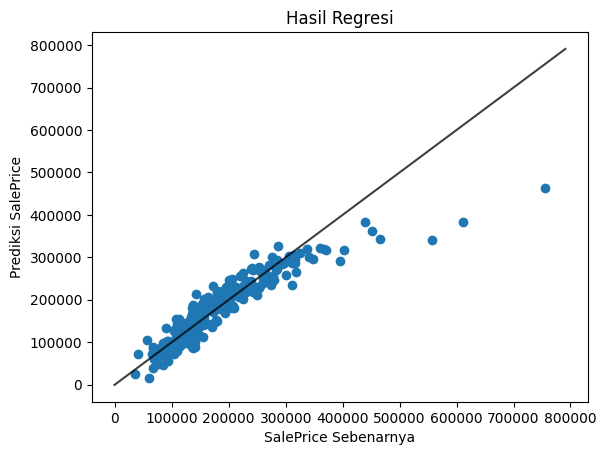

In [18]:
#Membuat scatterplot untuk melihat nilai asli dan prediksi
plt.scatter(Y_test, Y_pred)
plt.ylabel('Prediksi SalePrice')
plt.xlabel('SalePrice Sebenarnya')
plt.title('Hasil Regresi')

#membuat plotline
xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin, xmax, 70), np.linspace(xmin, xmax, 70), 'k-', alpha=0.75)
plt.show

Berdasarkan output, terlihat bahwa distribusi data berada di dekat garis y oleh karena itu dapat disimpulkan bahwa model baik dalam memprediksi target.

#Unsupervised Learning#

##Exploratory Data Analysis##

In [19]:
#Pandas show all column
pd.set_option('display.max_columns', 200)

###Load Dataset###

In [20]:
#read data
df2 = pd.read_csv('/content/drive/MyDrive/PZIB 2023/Tugas Data Analyst/Tugas 13-14/Mall_Customers.csv')
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


###Data Understanding###

In [21]:
#mencari informasi terkait dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
#mengeluarkan kolom yang tidak digunakan (irrelevant)
df2=df2.drop(columns=['CustomerID'])
df2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [23]:
#cek missing values
df2.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

###Statistical Summary###

In [24]:
#membagi data kategorik dan numerik
cats=[i for i in df2.columns if df2[i].dtypes == 'object']
nums=[i for i in df2.columns if df2[i].dtypes != 'object']

In [25]:
#mencari statistical summary pada data numerik
df2[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [26]:
#mencari unique value dan jumlahnya dari setiap variabel pada data kategori
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df2[col].value_counts())
    print()

Value count kolom Gender:
Female    112
Male       88
Name: Gender, dtype: int64



###Univariate Analysis###

####Boxplot####

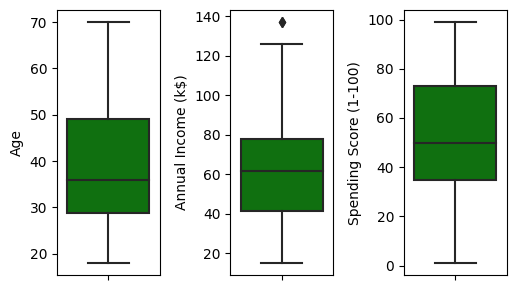

In [27]:
#Boxplot untuk variabel numerik
plt.figure(figsize=(7,3))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df2[nums[i]], color='green', orient='v')
    plt.tight_layout()

####Histplot####

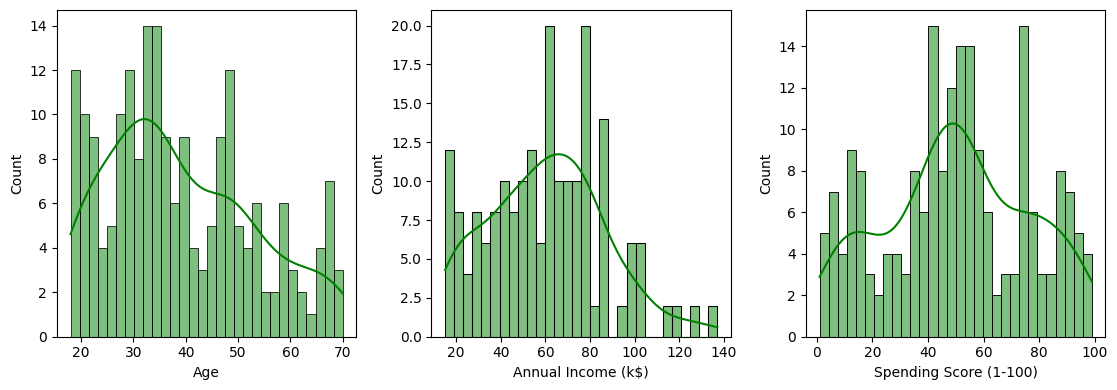

In [28]:
#Histogram untuk variabel numerik
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.histplot(df2[nums[i]], color='green', kde=True, bins = 30)
    plt.tight_layout()

##Clustering Model##

In [29]:
#import packages yang akan digunakan
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [30]:
#membuat data dalam bentuk array
mall_cust = df2[['Age','Annual Income (k$)', 'Spending Score (1-100)']].values

#menghitung nilai inersia pada iterasi ke i
inertia = []

for i in range(2, 11):
  
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(mall_cust)
  inertia.append(kmeans.inertia_)
  print('iterasi ke - ',i, 'dengan : ', kmeans.inertia_)

iterasi ke -  2 dengan :  212840.1698209719
iterasi ke -  3 dengan :  143342.751571706
iterasi ke -  4 dengan :  104366.15145556197
iterasi ke -  5 dengan :  75378.76464074483
iterasi ke -  6 dengan :  58302.40630860368
iterasi ke -  7 dengan :  51118.949931647294
iterasi ke -  8 dengan :  44312.46881207722
iterasi ke -  9 dengan :  40894.98978213978
iterasi ke -  10 dengan :  37468.51571576572


Text(0, 0.5, 'Inertia')

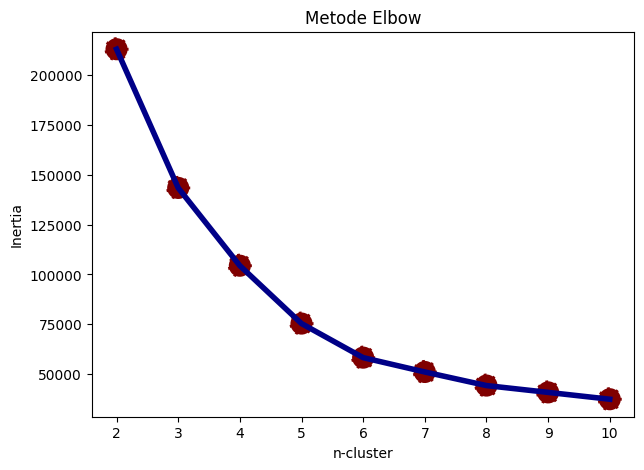

In [31]:
#visualisasi penentuan n-cluster menggunakan metode elbow
#plot nilai inersia
plt.figure(figsize=(7, 5))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.title('Metode Elbow')
plt.xlabel('n-cluster')
plt.ylabel('Inertia')

Cluster yang bagus yaitu disaat nilai inersia nya rendah namun jumlah clusternya tidak terlalu banyak.

Berdasarkan output, diperoleh jumlah cluster yang cukup baik adalah 6.

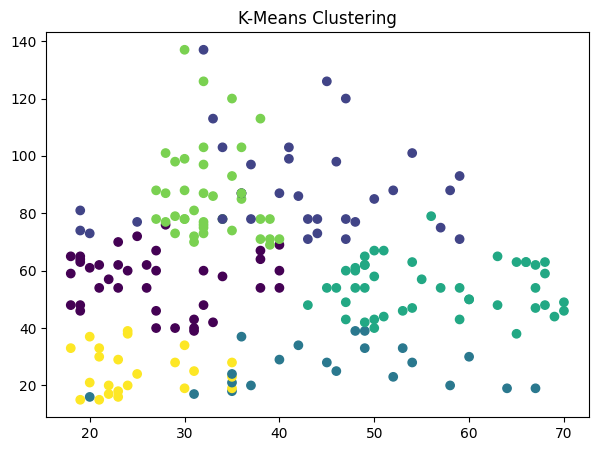

In [32]:
#mendefinisikan scaler dan model
scaler = StandardScaler()
model = KMeans(n_clusters=6)

#menjalankan pipeline dan fitting data
pipeline = make_pipeline(scaler, model)
pipeline.fit(mall_cust)

#visualisasi data dengan jumlah 6 cluster
labels = pipeline.predict(mall_cust)
plt.figure(figsize=(7,5))
plt.scatter(mall_cust[:,0], mall_cust[:,1], c=labels)
plt.title('K-Means Clustering')
plt.show()

Berdasarkan output, terlihat bahwa persebaran data setiap cluster masih berantakan (banyak yang terpisah jauh). Oleh karena itu, akan dilakukan dimentionally reduced dengan metode PCA.

##PCA##

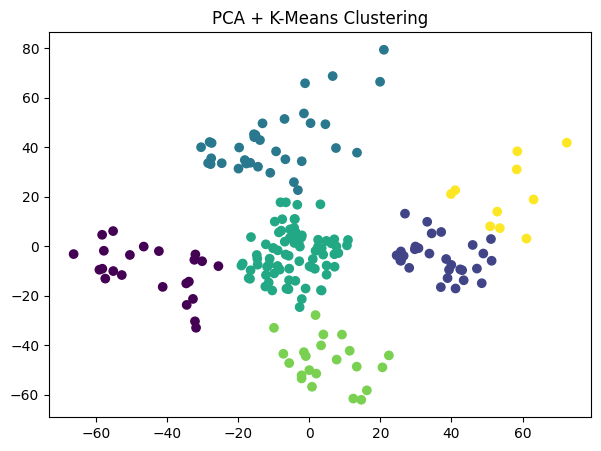

In [33]:
n_components = 2
pca = PCA(n_components=n_components)
mall_cust_reduced = pca.fit_transform(mall_cust)

#mendefinisikan kmeans dan fitting ke reduced data
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(mall_cust_reduced)

#visualisasi reduced data dengan 6 cluster
labels = kmeans.predict(mall_cust_reduced)
plt.figure(figsize=(7,5))
plt.scatter(mall_cust_reduced[:,0], mall_cust_reduced[:,1], c=labels)
plt.title('PCA + K-Means Clustering')
plt.show()

Berdasarkan output di atas, terlihat bahwa masing-masing cluster lebih terpisah. Oleh karena itu, dapat disimpulkan bahwa hasil clustering dengan PCA lebih baik.

##Evaluation Metrics##

In [34]:
#nilai silhouette score clustering tanpa pca
silhouette_avg = silhouette_score(mall_cust, labels)
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.4195543228272832


In [35]:
#nilai silhouette score clustering setelah menggunakan pca
silhouette_avg = silhouette_score(mall_cust_reduced, labels)
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.5364302947370858


Berdasarkan output, diperoleh nilai silhoutte score sebesar 0,536 yang artinya model clustering tergolong sedang.